# IMPORT LIBRARY

- Google Colab supaya dapat mengoperasikan colab lebih bebas. 
- Pandas untuk mengoperasikan pandas data frame.
- Numpy untuk operasi numerik. 
- Scipy.stats untuk operasi statitiska deskriptif. 
- Seaborn untuk memudahkan dalam visualisasi data.

- Matplotlib untuk visualisasi data. 
- Train_test_split untuk membagi data kita menjadi train dan test. 

- LabelEncoder untuk merubah data bertipe ordinal menjadi numerik.
- OneHotEncoder untuk merubah data bertipe nominal mernjadi numerik.

- StandardScaler untuk merubah skala dari data tersebut.

- LinearRegression untuk model machine learning kita yaitu LinearRegression. 
- DecisionTreeClassifier untuk model machine learning kita yaitu DecisionTree. 
- SVC untuk model machine learning kita yaitu SVM. 
- MLPRegresor untuk model machine learning kita yaitu NeuralNetwork.

- sklearn.metrics untuk matriks evaluasi model dengan akurasi dengan metode regresion 

- Warning untuk mengabaikan saran

In [ ]:
from google.colab import files, output
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error
import warnings

warnings.filterwarnings('ignore')
print("Semua library yang dibutuhkan telah terhubung")

Semua library yang dibutuhkan telah terhubung


# HUBUNGKAN COLAB DENGAN KAGGLE

Upload file kaggle.json yang sudah didownload (Create Token)

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hafidhahmadfauzan","key":"839ce63e6f4f833384b298ef18f8d269"}'}

Buat folder Kaggle, Copy Kaggle,json yang sudah diupload ke dalam direktori folder, lalu berikan perizinan untuk mengolah data

In [ ]:
# Buat folder Kaggle
!mkdir -p ~/.kaggle

# Copy Kaggle.json kedalam direktori yang sudah dibuat
!cp kaggle.json ~/.kaggle/

# Berikan perizinan untuk mengolah data
!chmod 600 /root/.kaggle/kaggle.json


print("folder, copy to direktori, dan perizinan berhasil dibuat")

folder, copy to direktori, dan perizinan berhasil dibuat


Download datasets VGSales

In [ ]:
!kaggle datasets download -d kedokedokedo/vgsales

output.clear()
print("Datasets telah berhasil didownload")

Datasets telah berhasil didownload


Check Icon-direktori-folder pada bagian kiri bagian tampilan GoogleColab. Data download berupa file zip. Langkah selanjutnya dalah unzip file tersebut

In [ ]:
!unzip vgsales.zip

output.clear()
print("Datasets berhasil diekstrak dan siap digunakan")

Datasets berhasil diekstrak dan siap digunakan


# BUKA DATASET CSV DENGAN PANDAS

 Buka datasets dan kita tampilkan 5 data teratas.

In [ ]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


####  CHECK DAN HAPUS DATA DUPLICATE

Hapus data yang sama untuk menghilangkan penumpukan data

In [ ]:
print("Total data sebelum hapus duplicates:", df.shape[0])
df = df.drop_duplicates()
print("Total data sebelum hapus duplicates:", df.shape[0])

Total data sebelum hapus duplicates: 16324
Total data sebelum hapus duplicates: 16324


# HANDLING MISSING VALUE

####  CHECK MISSING VALUE

Check apakah ada data yang kosong

In [ ]:
print("Total Data : ", df.shape[0])
print("Dimensi    : ", df.shape, "\n")
df.isnull().sum()

Total Data :  16324
Dimensi    :  (16324, 11) 



Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

Hitung Persentase dari missing value

In [ ]:
miss_publisher = (df['Publisher'].isnull().sum() / df.shape[0]) * 1
print(f"Missing Publisher : {miss_publisher:.5f} %")

Missing Publisher : 0.00221 %


####  MASUKKAN DATA BARU KE MISSING VALUE

Cari nilai modus pada kolom, karena data yang memiliki missing value merupakan data categorical

In [ ]:
mode_publisher = scipy.stats.mode(df['Publisher'])
mode_publisher

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

Isi data yang kosong dengan data baru menggunakan modus pada kolom. Karena data kosong dapat menyebabkan error dalam proses modeling

In [ ]:
df["Publisher"].fillna(mode_publisher[0][0], inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# AMBIL DATA SAMPLE

Karena data tersebut sangatlah banyak maka kita bisa ambil sample data untuk memudahkan model

In [ ]:
df_sample1000 = df.sample(1000)
df_sample1000.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6076,15402,Motocross Mania 3,XB,2005,Racing,Take-Two Interactive,0.01,0.00,0.0,0.00,0.02
77,4803,Congo Bongo,2600,1982,Action,Sega,0.37,0.02,0.0,0.00,0.40
6090,15822,The Incredibles: Rise of the Underminer,PC,2005,Action,THQ,0.01,0.00,0.0,0.00,0.02
6040,14686,Animaniacs: The Great Edgar Hunt,GC,2005,Platform,Ignition Entertainment,0.02,0.01,0.0,0.00,0.03
11684,7462,Dead to Rights: Retribution,X360,2010,Shooter,Namco Bandai Games,0.11,0.08,0.0,0.02,0.21


# Exploratory Data Analysist

proses eksplorasi data yang bertujuan untuk memahami isi dan komponen penyusun data

#### DESKRIPSI VARIABEL

In [ ]:
df_sample1000.columns = [column.lower() for column in df_sample1000.columns]
print("Total data:", df_sample1000.shape[0], end="\n\n")
df_sample1000.info()

Total data: 1000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 6076 to 3017
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          1000 non-null   int64  
 1   name          1000 non-null   object 
 2   platform      1000 non-null   object 
 3   year          1000 non-null   int64  
 4   genre         1000 non-null   object 
 5   publisher     1000 non-null   object 
 6   na_sales      1000 non-null   float64
 7   eu_sales      1000 non-null   float64
 8   jp_sales      1000 non-null   float64
 9   other_sales   1000 non-null   float64
 10  global_sales  1000 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 93.8+ KB


#### UNIQUE CATEGORICAL DATA

Value unique dapat memperlambat proses modeling karena sangatlah banyak sehingga model menjadi bingung

In [ ]:
unique_rank = len(df_sample1000['rank'].unique())
unique_name = len(df_sample1000['name'].unique())
unique_platform = len(df_sample1000['platform'].unique())
unique_year = len(df_sample1000['year'].unique())
unique_genre = len(df_sample1000['genre'].unique())
unique_publisher = len(df_sample1000['publisher'].unique())

print(f"Data unique Rank      : {unique_rank}")
print(f"Data unique Name      : {unique_name}")
print(f"Data unique Platform  : {unique_platform}")
print(f"Data unique Year      : {unique_year}")
print(f"Data unique Genre     : {unique_genre}")
print(f"Data unique Publisher : {unique_publisher}")

Data unique Rank      : 1000
Data unique Name      : 962
Data unique Platform  : 24
Data unique Year      : 33
Data unique Genre     : 12
Data unique Publisher : 179


#### DROP COLUMN UNIQUE WITH CATEGORICAL DATA

In [ ]:
before_categorical_object = [column for column in df_sample1000.columns if df_sample1000[column].dtype == 'object']
before_categorical_int64 = [column for column in df_sample1000.columns if df_sample1000[column].dtype == 'int64']

print(f"Before Drop Column Object : {before_categorical_object}")
print(f"Before Drop Column Int64  : {before_categorical_int64}")

Before Drop Column Object : ['name', 'platform', 'genre', 'publisher']
Before Drop Column Int64  : ['rank', 'year']


In [ ]:
df_sample1000 = df_sample1000.drop(columns=["rank", "name"])

after_categorical_object = [column for column in df_sample1000.columns if df_sample1000[column].dtype == 'object']
after_categorical_int64 = [column for column in df_sample1000.columns if df_sample1000[column].dtype == 'int64']

print(f"After Drop Column  : {after_categorical_object}")
print(f"After Drop Int64   : {after_categorical_int64}")

After Drop Column  : ['platform', 'genre', 'publisher']
After Drop Int64   : ['year']


# HANDLING OUTLIER VALUE

data point yang jauh berbeda dari data point lainnya dalam satu dataset yang sama. 

####  CHECK OUTLIER VALUE

Cek outliers data pada numerical kolom.

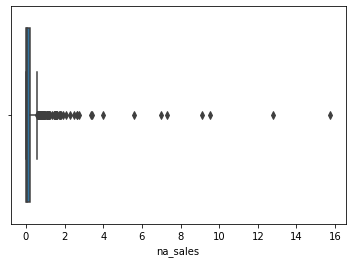

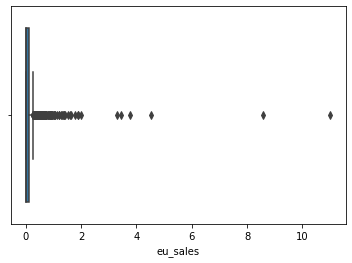

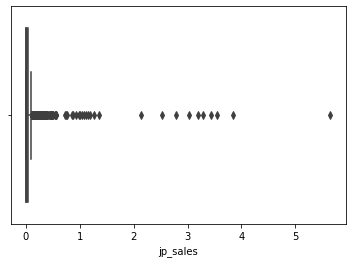

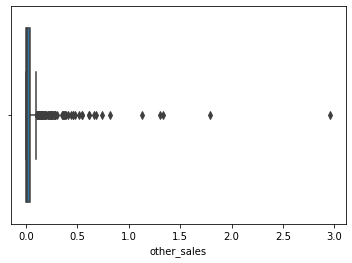

In [ ]:
# menampilkan data 1 persatu
# sns.boxplot(x='na_sales', data=df_sample1000)
# plt.show()

# sns.boxplot(x='eu_sales', data=df_sample1000)
# plt.show()


# menampilkan data dengan looping
numerical_columns = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
for column in numerical_columns:
    sns.boxplot(x=column, data=df_sample1000)
    plt.show()

#### CHECK INTERQUARTILE RANGE

Untuk mengetahui nilai data outliers, tentukan nilai dari batas atas dan batas bawah interquartile

In [ ]:
numerical_columns = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
for column in numerical_columns:
  Q1 = df_sample1000[column].quantile(0.25)
  Q3 = df_sample1000[column].quantile(0.75)
  IQR = Q3 - Q1
  batas_bawah = Q1 - (1.5 * IQR)
  batas_atas = Q3 + (1.5 * IQR)

  print(column.upper())
  print(f"Q1  : {Q1}")
  print(f"Q3  : {Q3}")
  print(f"IQR : {IQR}")
  print(f"Batas bawah : {batas_bawah:5.2f}")
  print(f"Batas atas  : {batas_atas:5.2f}" + "\n")

NA_SALES
Q1  : 0.0
Q3  : 0.2325
IQR : 0.2325
Batas bawah : -0.35
Batas atas  :  0.58

EU_SALES
Q1  : 0.0
Q3  : 0.1
IQR : 0.1
Batas bawah : -0.15
Batas atas  :  0.25

JP_SALES
Q1  : 0.0
Q3  : 0.042499999999999996
IQR : 0.042499999999999996
Batas bawah : -0.06
Batas atas  :  0.11

OTHER_SALES
Q1  : 0.0
Q3  : 0.04
IQR : 0.04
Batas bawah : -0.06
Batas atas  :  0.10



Handling outliers menggunakan batas atas dan batas bawah

In [ ]:
df_na_Atas = df_sample1000['na_sales'] < batas_atas
df_na_Bawah = df_sample1000['na_sales'] > batas_bawah

df_eu_Atas = df_sample1000['eu_sales'] < batas_atas
df_eu_Bawah = df_sample1000['eu_sales'] > batas_bawah

df_jp_Atas = df_sample1000['jp_sales'] < batas_atas
df_jp_Bawah = df_sample1000['jp_sales'] > batas_bawah

df_oth_Atas = df_sample1000['other_sales'] < batas_atas
df_oth_Bawah = df_sample1000['other_sales'] > batas_bawah

df_handling = df_sample1000[((df_na_Atas & df_na_Bawah) & (df_eu_Atas & df_eu_Bawah) & (df_jp_Atas & df_jp_Bawah) & (df_oth_Atas & df_oth_Bawah))]

df_handling.head(4)

,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
6076,XB,2005,Racing,Take-Two Interactive,0.01,0.00,0.00,0.0,0.02
6090,PC,2005,Action,THQ,0.01,0.00,0.00,0.0,0.02
6040,GC,2005,Platform,Ignition Entertainment,0.02,0.01,0.00,0.0,0.03
15900,PS4,2015,Action,D3Publisher,0.00,0.00,0.02,0.0,0.02


Check kembali data menggunakan grafik

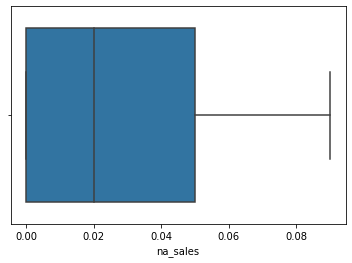

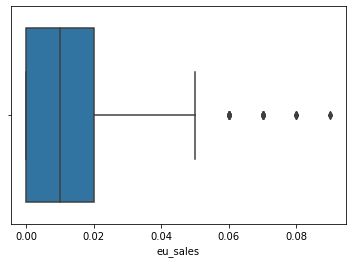

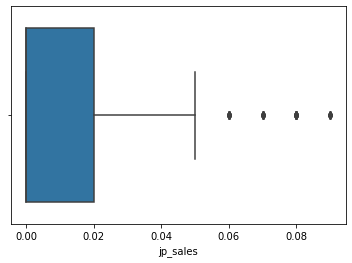

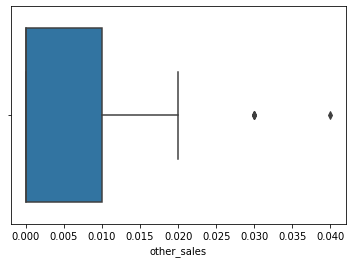

In [ ]:
numerical_columns = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
for column in numerical_columns:
    sns.boxplot(x=column, data=df_handling)
    plt.show()

In [ ]:
print("Total data (before delete outliers) : ", df_sample1000.shape[0])
print("Total data (after delete outliers)  : ", df_handling.shape[0])

Total data (before delete outliers) :  1000
Total data (after delete outliers)  :  413


# Exploratory Data Analysist After Prepocessing

#### DESKRIPSI VARIABEL

In [ ]:
print("Total data:", df_handling.shape[0], end="\n\n")
df_handling.info()

Total data: 413

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 6076 to 12376
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   platform      413 non-null    object 
 1   year          413 non-null    int64  
 2   genre         413 non-null    object 
 3   publisher     413 non-null    object 
 4   na_sales      413 non-null    float64
 5   eu_sales      413 non-null    float64
 6   jp_sales      413 non-null    float64
 7   other_sales   413 non-null    float64
 8   global_sales  413 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 32.3+ KB


# UNIVARIATE ANALYSIST

#### CATEGORICAL FEATURES

Analisa untuk kolom categorical

      Total data  Persentase
DS            67        16.2
PS2           55        13.3
PC            36         8.7
X360          34         8.2
PSP           31         7.5
Wii           23         5.6
PS            23         5.6
GBA           23         5.6
XB            20         4.8
PS3           19         4.6
GC            18         4.4
PSV           17         4.1
3DS           15         3.6
PS4            7         1.7
N64            6         1.5
XOne           5         1.2
SAT            5         1.2
SNES           4         1.0
WiiU           2         0.5
NG             1         0.2
DC             1         0.2
GB             1         0.2



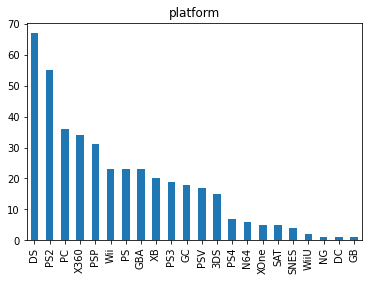

      Total data  Persentase
2010          45        10.9
2009          37         9.0
2011          32         7.7
2006          32         7.7
2005          30         7.3
2007          25         6.1
2008          24         5.8
2015          21         5.1
2003          20         4.8
2004          19         4.6
2012          19         4.6
2014          16         3.9
2002          15         3.6
2016          14         3.4
2013          13         3.1
2001          12         2.9
1995           9         2.2
1996           8         1.9
1997           6         1.5
1998           5         1.2
2000           3         0.7
1999           3         0.7
1994           2         0.5
1993           2         0.5
1991           1         0.2



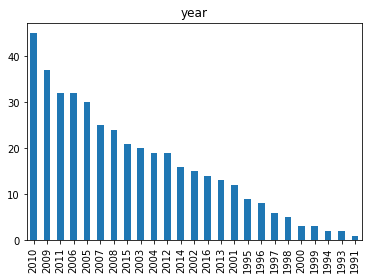

              Total data  Persentase
Action                94        22.8
Sports                54        13.1
Adventure             42        10.2
Misc                  39         9.4
Racing                35         8.5
Shooter               33         8.0
Role-Playing          28         6.8
Simulation            24         5.8
Fighting              21         5.1
Strategy              16         3.9
Platform              14         3.4
Puzzle                13         3.1



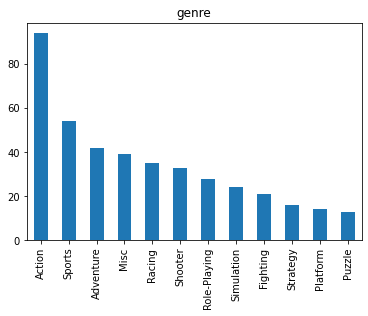

                              Total data  Persentase
Konami Digital Entertainment          34         8.2
Namco Bandai Games                    27         6.5
Electronic Arts                       16         3.9
Capcom                                15         3.6
Ubisoft                               15         3.6
...                                  ...         ...
Natsume                                1         0.2
Asylum Entertainment                   1         0.2
Storm City Games                       1         0.2
Alchemist                              1         0.2
Culture Brain                          1         0.2

[137 rows x 2 columns]



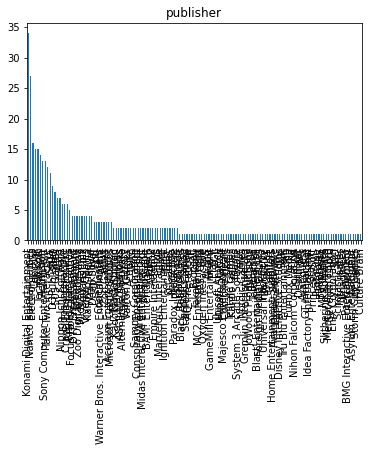

In [ ]:
categorical_column = ["platform", "year", "genre", "publisher"]

for column in categorical_column:
    count = df_handling[column].value_counts()
    percent = 100*df_handling[column].value_counts(normalize=True)

    # make dataframe
    new_df = pd.DataFrame({'Total data':count, 'Persentase':percent.round(1)})
    print(new_df, end="\n\n")
    count.plot(kind='bar', title=column)
    plt.show()

#### NUMERICAL FEATURES

Analisa untuk kolom numerical

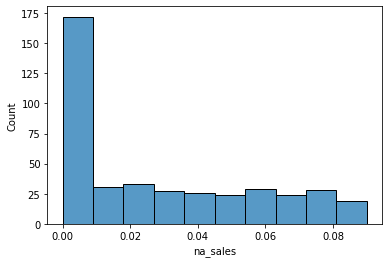

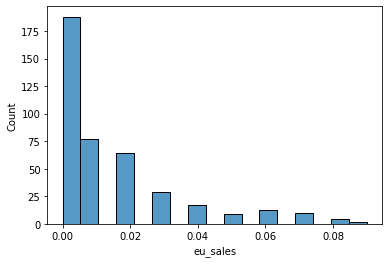

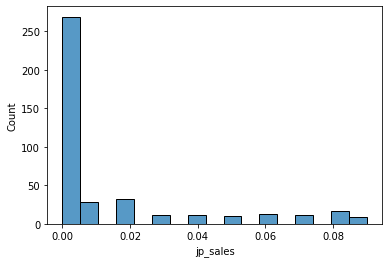

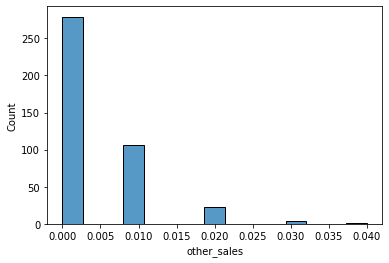

In [ ]:
numerical_columns = ["na_sales", "eu_sales", "jp_sales", "other_sales"]

for column in numerical_columns:
    sns.histplot(df_handling[column])
    plt.show()

# MULTIVARIATE ANALYSIST

#### CATEGORICAL FEATURES 

Analisa hubungan antara categorical kolom dengan kolom GlobalSales

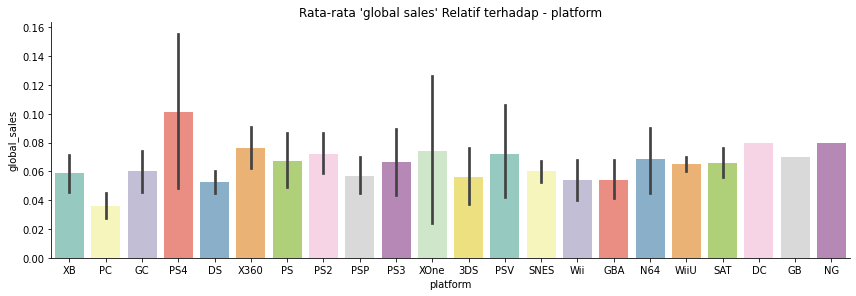

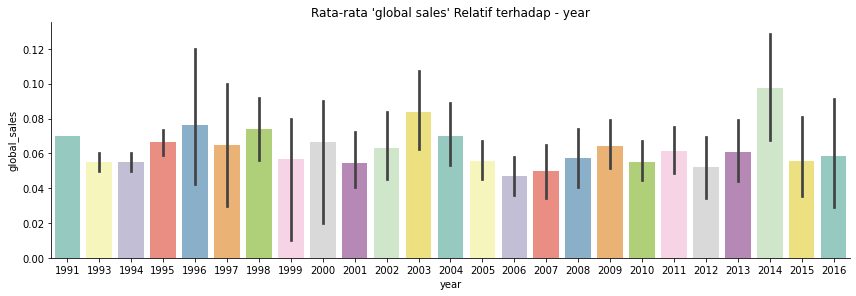

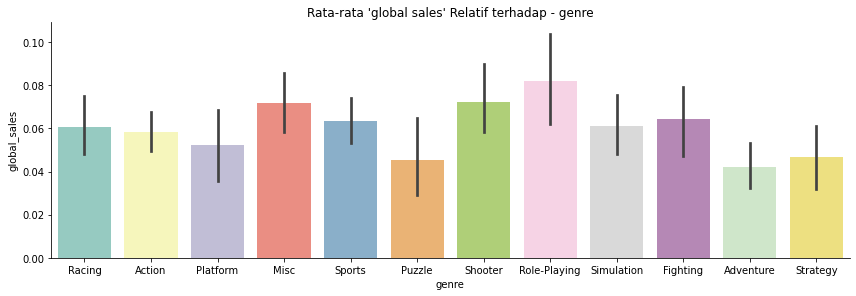

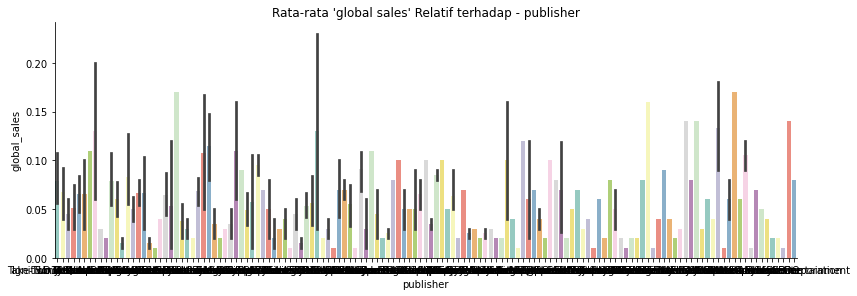

In [ ]:
categorical_column = ["platform", "year", "genre", "publisher"]

for col in categorical_column:
  sns.catplot(x=col, y="global_sales", kind="bar", dodge=False, height=4, aspect=3,  
              data=df_handling, palette="Set3")
  plt.title("Rata-rata 'global sales' Relatif terhadap - {}".format(col))
  plt.show()

plt.show()

#### NUMERICAL FEATURES

Analisa hubungan antara numerical kolom dengan kolom GLobalSales

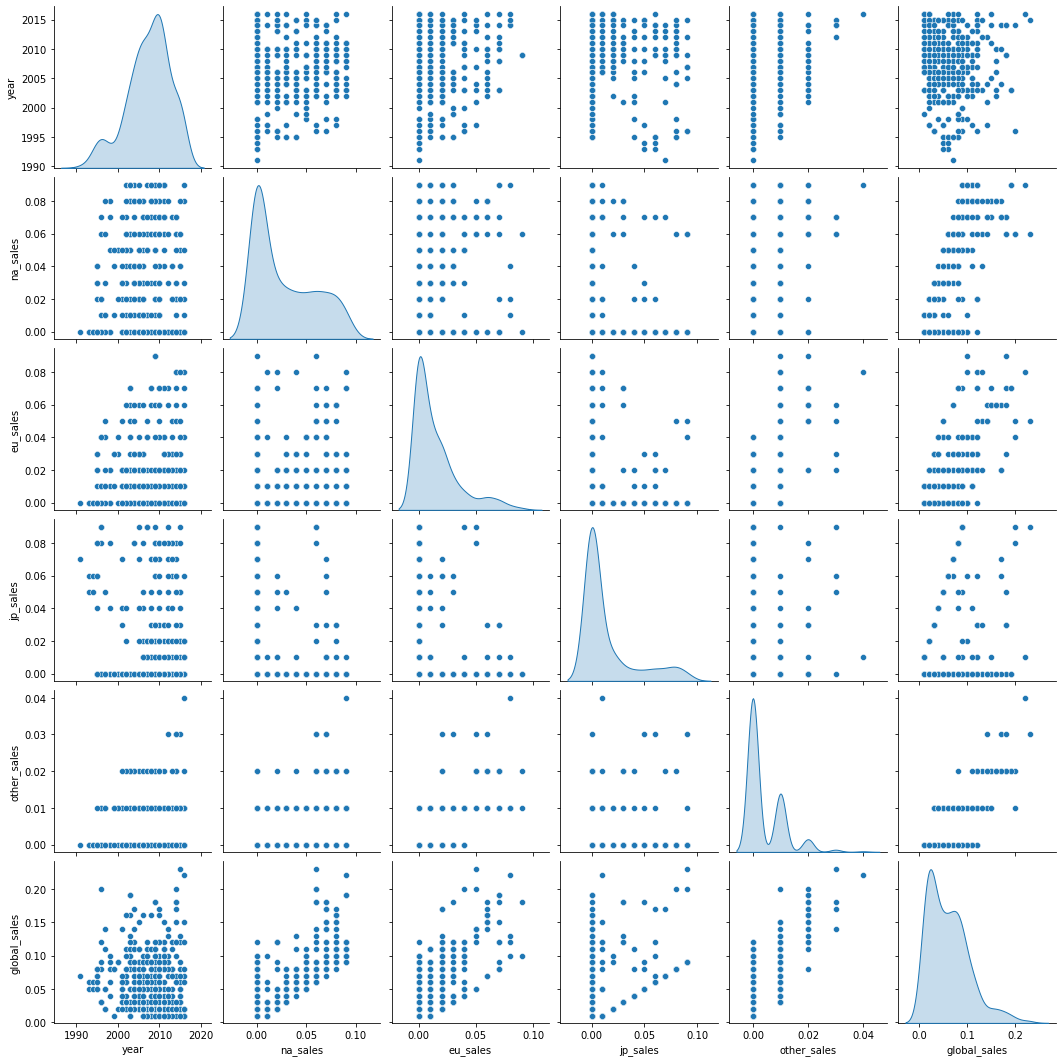

In [ ]:
sns.pairplot(df_handling, diag_kind="kde")
plt.show()

#### CEK CORRELATION UNTUK FITUR NUMERIK

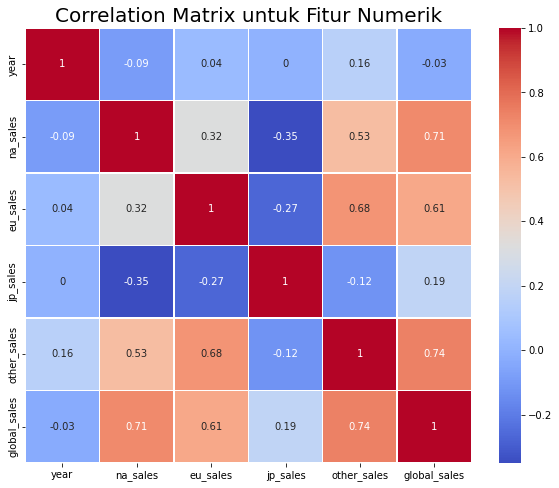

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_handling.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

#### DROP FITUR YANG TIDAK MEMILIKI KORELASI DAN KOLOM UNIQUE

Kolom yang tidak berkorelasi dapat memperlambat proses karena kolom tersebut tidak terlalu dibutuhkan, sedangkan kolom unik dapat memperlambat perhitungan data

In [ ]:
# print("Before Drop Column: \n", df.columns)
# # df = df.drop(columns=["jp_sales"])
# # print("\nAfter Drop Column: \n", df.columns)

# DATA PREPARATION

In [ ]:
df_handling.head(10)

,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
6076,XB,2005,Racing,Take-Two Interactive,0.01,0.00,0.00,0.00,0.02
6090,PC,2005,Action,THQ,0.01,0.00,0.00,0.00,0.02
6040,GC,2005,Platform,Ignition Entertainment,0.02,0.01,0.00,0.00,0.03
15900,PS4,2015,Action,D3Publisher,0.00,0.00,0.02,0.00,0.02
11979,DS,2010,Misc,Take-Two Interactive,0.08,0.01,0.00,0.01,0.09
11957,X360,2010,Sports,Activision,0.09,0.00,0.00,0.01,0.10
13133,DS,2011,Puzzle,Mastertronic,0.05,0.04,0.00,0.01,0.10
3323,GC,2002,Shooter,Universal Interactive,0.09,0.02,0.00,0.00,0.11
844,PS,1996,Role-Playing,ArtDink,0.06,0.04,0.09,0.01,0.20
6894,PS2,2006,Simulation,Kando Games,0.02,0.01,0.00,0.00,0.03


#### ENCODING CATEGORICAL DATA -> TIPE ORDINAL

Karena model machine learning hanya menerima data numerik sebagai masukkan.
Maka kita harus merubah CATEGORICAL DATA (Tipe : Ordinal) menggunakan encoding : Label Encoder

In [ ]:
new_df = df_handling

categorical_ordinal = [column for column in new_df.columns if new_df[column].dtype == 'int64']
print(categorical_ordinal)

la_enc = LabelEncoder()

for column in categorical_ordinal:
  new_df[column] = la_enc.fit_transform(new_df[column])
 
  # untuk menampilkan data hasil encode per column
  # integer_encoded_obj = la_enc.fit_transform(new_df[column])
  # print(column, " : ", integer_encoded_obj)

new_df.head(10)

['year']


,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
6076,XB,13,Racing,Take-Two Interactive,0.01,0.00,0.00,0.00,0.02
6090,PC,13,Action,THQ,0.01,0.00,0.00,0.00,0.02
6040,GC,13,Platform,Ignition Entertainment,0.02,0.01,0.00,0.00,0.03
15900,PS4,23,Action,D3Publisher,0.00,0.00,0.02,0.00,0.02
11979,DS,18,Misc,Take-Two Interactive,0.08,0.01,0.00,0.01,0.09
11957,X360,18,Sports,Activision,0.09,0.00,0.00,0.01,0.10
13133,DS,19,Puzzle,Mastertronic,0.05,0.04,0.00,0.01,0.10
3323,GC,10,Shooter,Universal Interactive,0.09,0.02,0.00,0.00,0.11
844,PS,4,Role-Playing,ArtDink,0.06,0.04,0.09,0.01,0.20
6894,PS2,14,Simulation,Kando Games,0.02,0.01,0.00,0.00,0.03


#### ENCODING CATEGORICAL DATA -> TIPE NOMINAL

Karena model machine learning hanya menerima data numerik sebagai masukkan.
Maka kita harus merubah CATEGORICAL DATA (Tipe : Nominal) menggunakan encoding : One Hot Encoding

In [ ]:
new_df = new_df

categorical_nominal = [column for column in new_df.columns if new_df[column].dtype == 'object']
print(categorical_nominal)

la_enc = LabelEncoder()

for column in categorical_nominal:
  new_df[column] = la_enc.fit_transform(new_df[column])
 
  # untuk menampilkan data hasil encode per column
  # integer_encoded_obj = la_enc.fit_transform(new_df[column])
  # print(column, " : ", integer_encoded_obj)

new_df.head(10) 

['platform', 'genre', 'publisher']


,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
6076,20,13,6,117,0.01,0.00,0.00,0.00,0.02
6090,8,13,0,114,0.01,0.00,0.00,0.00,0.02
6040,5,13,4,61,0.02,0.01,0.00,0.00,0.03
15900,12,23,0,35,0.00,0.00,0.02,0.00,0.02
11979,2,18,3,117,0.08,0.01,0.00,0.01,0.09
11957,19,18,10,8,0.09,0.00,0.00,0.01,0.10
13133,2,19,5,76,0.05,0.04,0.00,0.01,0.10
3323,5,10,8,126,0.09,0.02,0.00,0.00,0.11
844,9,4,7,13,0.06,0.04,0.09,0.01,0.20
6894,10,14,9,70,0.02,0.01,0.00,0.00,0.03


Tampilkan info dari data

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 6076 to 12376
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   platform      413 non-null    int64  
 1   year          413 non-null    int64  
 2   genre         413 non-null    int64  
 3   publisher     413 non-null    int64  
 4   na_sales      413 non-null    float64
 5   eu_sales      413 non-null    float64
 6   jp_sales      413 non-null    float64
 7   other_sales   413 non-null    float64
 8   global_sales  413 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 52.3 KB


In [ ]:
new_df = new_df.astype("float64")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 6076 to 12376
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   platform      413 non-null    float64
 1   year          413 non-null    float64
 2   genre         413 non-null    float64
 3   publisher     413 non-null    float64
 4   na_sales      413 non-null    float64
 5   eu_sales      413 non-null    float64
 6   jp_sales      413 non-null    float64
 7   other_sales   413 non-null    float64
 8   global_sales  413 non-null    float64
dtypes: float64(9)
memory usage: 52.3 KB


#### STANDARISASI VALUE

Kita standarisasi data tersebut dengan menggunakan StandardScaler. Supaya perbandingan jarak antar kolom satu dengan yang lain tidaklah jauh.

In [ ]:
all_columns = new_df.columns[:-1]
scaler = StandardScaler()
new_df[all_columns] = scaler.fit_transform(new_df[all_columns])
new_df.head()

,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
6076,1.691410,-0.452263,0.349412,1.173073,-0.577113,-0.744920,-0.567912,-0.613343,0.02
6090,-0.303979,-0.452263,-1.213482,1.096717,-0.577113,-0.744920,-0.567912,-0.613343,0.02
6040,-0.802826,-0.452263,-0.171553,-0.252240,-0.248810,-0.234718,-0.567912,-0.613343,0.03
15900,0.361151,1.463476,-1.213482,-0.913992,-0.905416,-0.744920,0.220483,-0.613343,0.02
11979,-1.301673,0.505606,-0.432035,1.173073,1.721005,-0.234718,-0.567912,0.894458,0.09


# TRAIN-TEST-SPLIT

Pisahkan data menjadi data train dan data test. Supaya model machine learning kita dapat mempelajari data baru yaitu tes, bukan hanya berkutat pada data latih.

In [ ]:
# data feature / prediction
x = new_df.drop(columns=["global_sales"])

# data target / label
y = new_df["global_sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

print(f'Total # of sample in whole dataset : {len(x)}')
print(f'Total # of sample in train dataset : {len(x_train)}')
print(f'Total # of sample in test dataset  : {len(x_test)}')

Total # of sample in whole dataset : 413
Total # of sample in train dataset : 330
Total # of sample in test dataset  : 83


# MODEL DEVELOPMENT

#### MAKE METODE ALGORITHM MODEL

In [ ]:
lab_enc = LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

print("y_train berhasil di-encode")

y_train berhasil di-encode


Metode yang biasa digunakan untuk model Regression antara lain : 
DecisionTree, Linear Regression, SVC, Neural Network

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train_encoded)

lr = LinearRegression()
lr.fit(x_train, y_train_encoded)

svm = SVC()
svm.fit(x_train, y_train_encoded)

nn = MLPRegressor()
nn.fit(x_train, y_train_encoded)

print("Semua model berhasil dibuat")

Semua model berhasil dibuat


#### EVALUASI MODEL

Evaluasi akurasi model pada data

In [ ]:
# index name in column train & test
evaluation = pd.DataFrame(columns=['train', 'test'], index=["Decision Tree",
                                                            "Linear Regression",
                                                            "SVM", 
                                                            "Neural Network"])

# value
model_dict = {
    "Decision Tree": dt,
    "Linear Regression": lr,
    "SVM": svm,
    "Neural Network": nn
}

print("Index name dan Value berhasil dibuat")

Index name dan Value berhasil dibuat


#### Test Regression : explained_variance_score

melakukan test terhadap data tentanf enjelaskan skor varians

In [ ]:
for name, metode in model_dict.items():
  evaluation.loc[name, 'train'] = explained_variance_score(y_true = y_train, y_pred = metode.predict(x_train))
  evaluation.loc[name, 'test'] = explained_variance_score(y_true = y_test, y_pred = metode.predict(x_test))
    
print("explained_variance_score")
evaluation

explained_variance_score


,train,test
Decision Tree,-9697.69,-10887.2
Linear Regression,-9598.56,-10166.7
SVM,-8257.97,-6747.51
Neural Network,-9437.05,-9609.5


Plot hasil dari evaluasi model regression : explained_variance_score

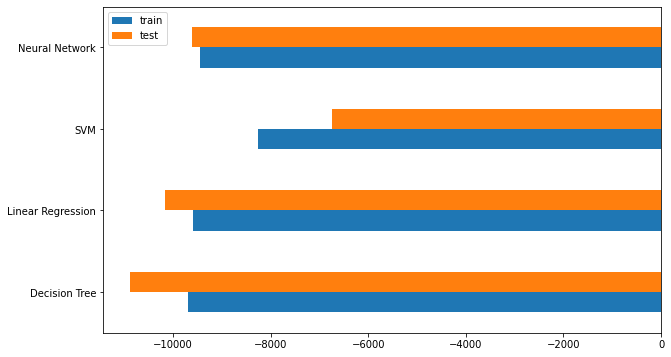

In [ ]:
evaluation.plot(kind='barh', figsize=(10, 6))

plt.show()

#### Test Regression : mean_squared_error

In [ ]:
for name, metode in model_dict.items():
  evaluation.loc[name, 'train'] = mean_squared_error(y_true = y_train, y_pred = metode.predict(x_train))
  evaluation.loc[name, 'test'] = mean_squared_error(y_true = y_test, y_pred = metode.predict(x_test))
    
print("mean_squared_error")
evaluation

mean_squared_error


,train,test
Decision Tree,43.3629,45.6879
Linear Regression,43.1779,44.2468
SVM,37.8656,33.0595
Neural Network,42.6596,43.2566


Plot hasil dari evaluasi model regression : mean_absolute_error

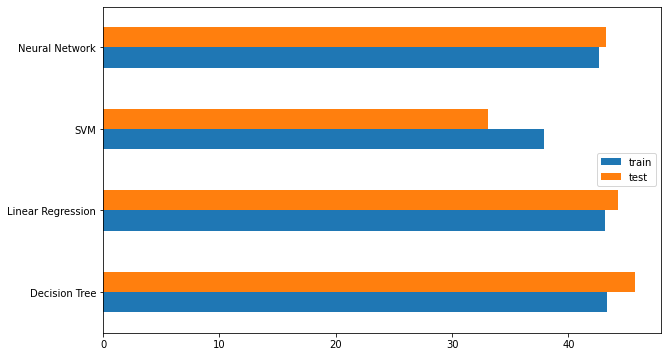

In [ ]:
evaluation.plot(kind='barh', figsize=(10, 6))

plt.show()

#### Test Regression : mean_absolute_error

In [ ]:
for name, metode in model_dict.items():
  evaluation.loc[name, 'train'] = mean_absolute_error(y_true = y_train, y_pred = metode.predict(x_train))
  evaluation.loc[name, 'test'] = mean_absolute_error(y_true = y_test, y_pred = metode.predict(x_test))
    
print("mean_absolute_error")
evaluation

mean_absolute_error


,train,test
Decision Tree,5.02882,5.13566
Linear Regression,5.02694,5.11614
SVM,4.73918,4.58964
Neural Network,5.01212,5.13591


Plot hasil dari evaluasi model regression : mean_absolute_error

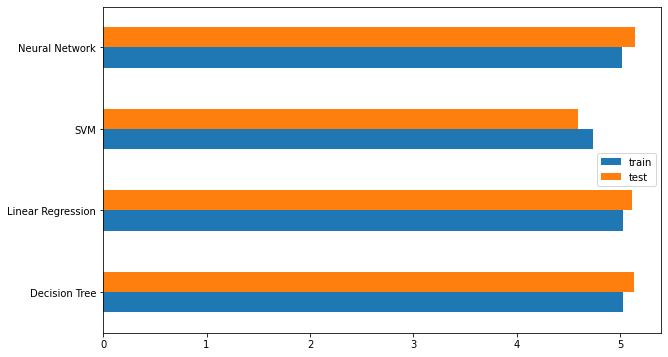

In [ ]:
evaluation.plot(kind='barh', figsize=(10, 6))

plt.show()

#### Test Regression : median_absolute_error

In [ ]:
for name, metode in model_dict.items():
  evaluation.loc[name, 'train'] = median_absolute_error(y_true = y_train, y_pred = metode.predict(x_train))
  evaluation.loc[name, 'test'] = median_absolute_error(y_true = y_test, y_pred = metode.predict(x_test))
    
print("median_absolute_error")
evaluation

median_absolute_error


,train,test
Decision Tree,3.95,3.95
Linear Regression,4.17656,4.79183
SVM,3.95,3.98
Neural Network,4.18696,4.63838


Plot hasil dari evaluasi model regression : median_absolute_error

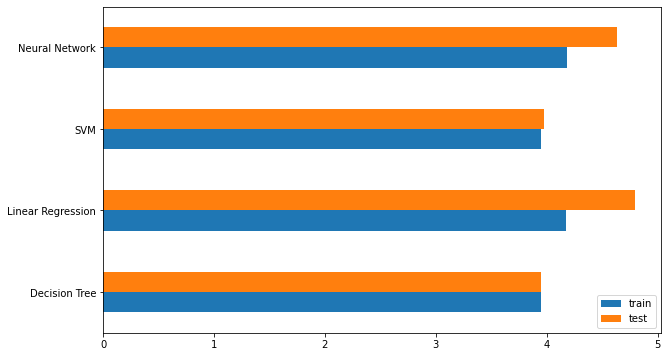

In [ ]:
evaluation.plot(kind='barh', figsize=(10, 6))

plt.show()